# Análise e Previsão de Preços de Casas

<img src = "housesbanner.png"/>

#### Autor : Alexandre Kalebe Saback Silva

# Contextualização do Problema
Imagine que você trabalha como analista de dados em uma empresa que vende imóveis e sua tarefa é realizar a previsão dos preços de futuras casas a serem vendidas. Após realizar a análise exploratória dos dados desse *dataset* será possível identificar os principais fatores que influenciam o preço de uma casa e construir um modelo de Machine Learning para realizar previsões através dos dados.

# Obtenção dos dados
Os dados utilizados nesse projeto estão [neste link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).
No mesmo link também é possível consultar todo o dicionário de variáveis para facilitar o entendimento da análise.

# Começando
O primeiro passo da nossa análise é carregar as bibliotecas necessárias, e os dados a serem analisados.

Aqui, utilizaremos a biblioteca `Pandas`, que nos permite trabalhar com arquivos csv com mais facilidade, em um formato tabular, que lembra as tabelas do Excel.

`Matplotlib` e `Seaborn` são bibliotecas gráficas que utilizaremos para plotar visualizações.

`Numpy` é uma das bibliotecas mais utilizadas em Data Science, e nos dá suporte para trabalharmos com arrays multidimensionais, matrizes, etc.

`Scipy` é um ecosistema de softwares open-source baseado em Python para matemática, ciência e engenharia.

`Sklearn` é uma biblioteca de machine learning (aprendizado de máquina) open-source para Python.

Sabendo disso, vamos botar a mão na massa!

In [1]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Agora é hora de carregar os dados e iniciar a análise.

In [2]:
# Carregando os dados
df_train = pd.read_csv('train.csv')

In [3]:
# Verificando o tamanho do dataset. Linhas x Colunas
df_train.shape

(1460, 81)

In [4]:
# Dando uma olhada rápida nos dados
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Verificando as colunas (features) do dataset
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Analisando "SalePrice"

O objetivo desse projeto é prever preços de casas que não estão nesse dataset, e para isso é necessário analisar a váriavel independente (target), que nesse caso é a *feature* "SalePrice". Além disso, ela é uma varíavel numérica, sendo assim, aqui temos um problema de regressão, pois faremos a previsão de um valor numérico contínuo.

* `Variável numérica`: Os valores de uma variável quantitativa ou numérica são números que representam geralmente uma contagem ou uma medição.

* `Variável categórica`: Os valores de uma variável categórica são categorias ou grupos mutuamente exclusivos. Os dados categóricos podem ou não ter alguma ordem lógica.

In [6]:
# Análise descritiva
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Com essa simples linha de código acima, podemos verificar o total de casas, a média, o desvio padrão, o valor mínimo e os percentis 25, 50 e 75 da variável independente. É importante lembrar que essas medidas só são obtidas em variáveis numérica, que é o caso em questão.

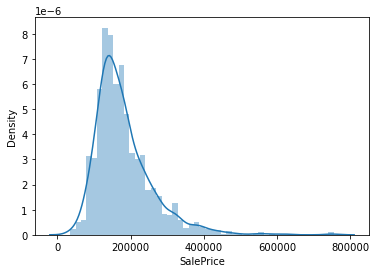

In [7]:
# Histograma
sns.distplot(df_train['SalePrice'])

Através do gráfico acima é possível extrair algumas informações sobre a variável target.
* A variável desvia de uma distribuição normal.

* Possui assimetria positiva, ou seja a curva de simetria está do lado direito, com isso é possível afirmar que a média é maior que a mediana e a moda: Média > Mediana > Moda.

* É possível identificar um pico no gráfico.

In [8]:
# Assimetria e curtose
print('Skewness: %f' %df_train['SalePrice'].skew())
print('Kurtosis: %f' %df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


* `Coeficiente de Assimetria`: Um coeficiente de assimetria quantifica o desvio de uma distribuição em relação a uma distribuição simétrica e o sinal resultante do seu cálculo nos dá o tipo de assimetria da distribuição.

* `Curtose`: Denomina - se curtose ao grau de “achatamento” de uma distribuição de freqüências, geralmente unimodal, medido em relação ao de uma distribuição normal (de Gauss) que é tomada como padrão. Quando Cm ≅ 3,00 → diremos que a distribuição é mesocúrtica . Quando Cm < 3,00 → diremos que a distribuição é platicúrtica. Quando Cm > 3,00 → diremos que a distribuição é leptocúrtica


#### As relações de "SalePrice" com variáveis numéricas.

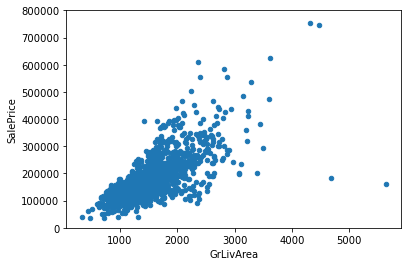

In [9]:
# Scatter Plot grlivarea/saleprice
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim=(0,800000))

É possível identificar uma relação linear entre "SalePrice" e "GrLivArea"

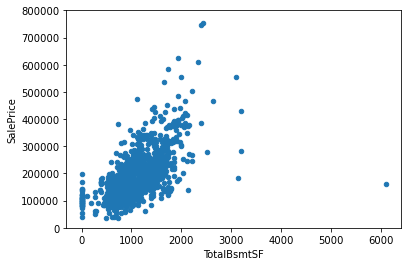

In [10]:
# Scatter Plot TotalBsmtSF/SalePrice
data = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']], axis = 1)
data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim = (0,800000))

Aqui temos uma relação linear bem mais forte do que a anterior, talvez uma relação exponencial?

#### As relações de "SalePrice" com variáveis categóricas.

(-0.5, 9.5, 0.0, 800000.0)

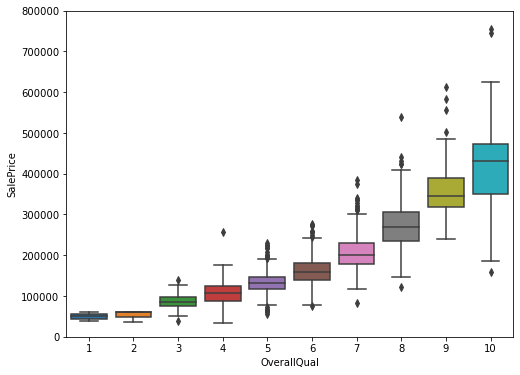

In [11]:
#Box Plot overallqual/saleprice
data = pd.concat([df_train['SalePrice'],df_train['OverallQual']], axis = 1)
fig,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

Como esperado, quanto maior a qualidade dos materiais (OverallQual), maior o preço de venda da casa.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

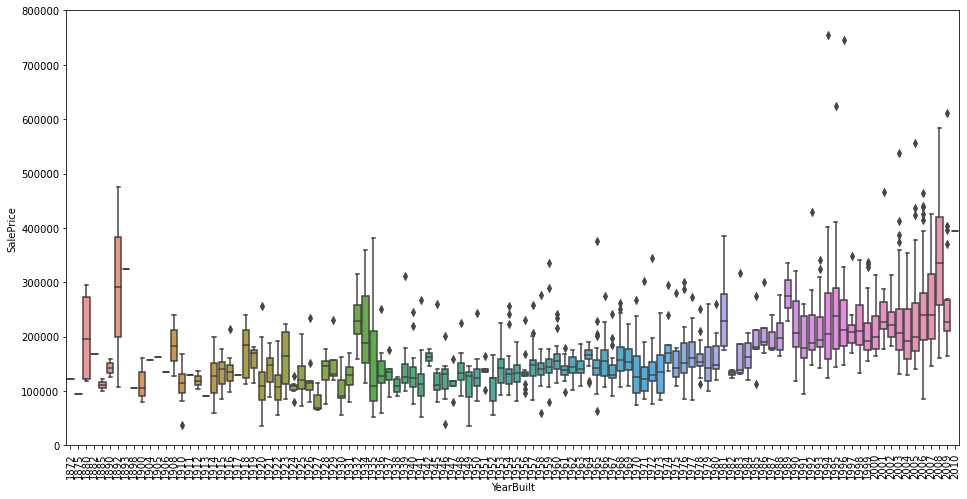

In [12]:
data = pd.concat([df_train['SalePrice'],df_train['YearBuilt']], axis = 1)
fig,ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation=90)

Embora não seja uma tendência, as casas mais novas em geral são mais caras que as antigas.

#### Resumo
* `GrLivArea` e `TotalBsmtSF` parecem estar relacionados de forma linear com `SalePrice`. Além disso, ambas as relações são positivas, ou seja, à medida que uma variável aumenta, a outra também aumenta. No caso de `TotalBsmtSF`, podemos ver que a inclinação da relação linear é particularmente alta.

* `OverallQual` e `YearBuilt` também parecem estar relacionados com `SalePrice`. A relação parece ser mais forte com `OverallQuall`, onde o boxplot mostra como os preços de venda aumentam com a qualidade geral das casas.

# Trabalhando de forma inteligente

Até agora utilizamos apenas nossa intuição e analisamos as variáveis que pensamos ser as mais importantes. Sendo assim, podemos dizer que a análise inicial foi bem superficial e, portanto, é de fundamental importância realizar análises mais profundas e objetivas. 

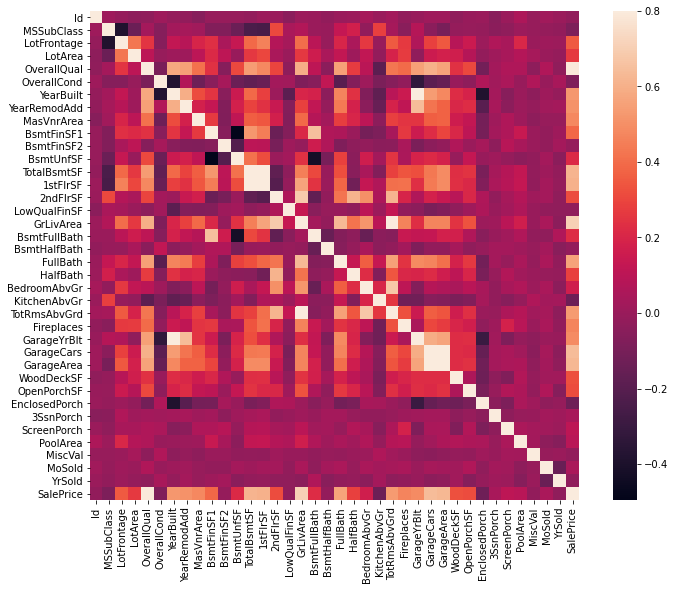

In [13]:
# Matriz de Correlação
corrmat = df_train.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Essa matriz pode ser bem confusa para alguns, visto que esse dataset possui mais de 80 variáveis, então vamos por parte.
* O principal objetivo da Matriz de Correlação é verificar, como o nome sugere, as correlações existentes entre as diversas variáveis existentes no dataset. Com isso em mente, é possível verificar o grau de correlação entre as variáveis observando a intensidade das cores na matriz, ou seja, se a cor for clara, isso indica uma correlação positiva e, se a cor for escura, indica uma correlação negativa.

* À primeira vista, dois quadrados vermelhos chamam a atenção. O primeiro refere-se às variáveis `TotalBsmtSF` e `1stFlrSF` e o segundo refere-se às variáveis `GarageX`. Ambos os casos mostram o quão significativa é a correlação entre essas variáveis. Na verdade, essa correlação é tão forte que pode indicar uma situação de multicolinearidade. Se pensarmos nessas variáveis, podemos concluir que elas fornecem quase as mesmas informações para que a multicolinearidade realmente ocorra.

* Outra coisa chama a atenção são as correlações de ´SalePrice´. Podemos confirmar novamente que `GrLivArea`, `TotalBsmtSF` e `OverallQual` possuem uma forte relação com `SalePrice`, mas também podemos ver muitas outras variáveis que devem ser levadas em consideração. E é exatamente o que faremos a seguir.

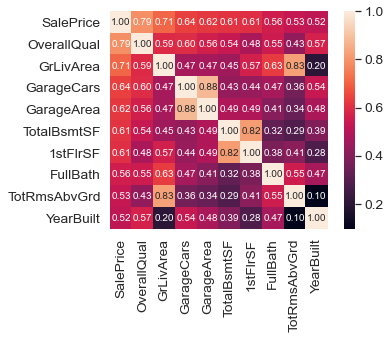

In [14]:
# Matriz de Correlação - SalePrice
k = 10 # número de variáveis pro heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Agora temos uma noção maior das variáveis mais importantes em relação à variável target (SalePrice).

#### Scatter plots entre 'SalePrice' e suas variáveis correlacionadas

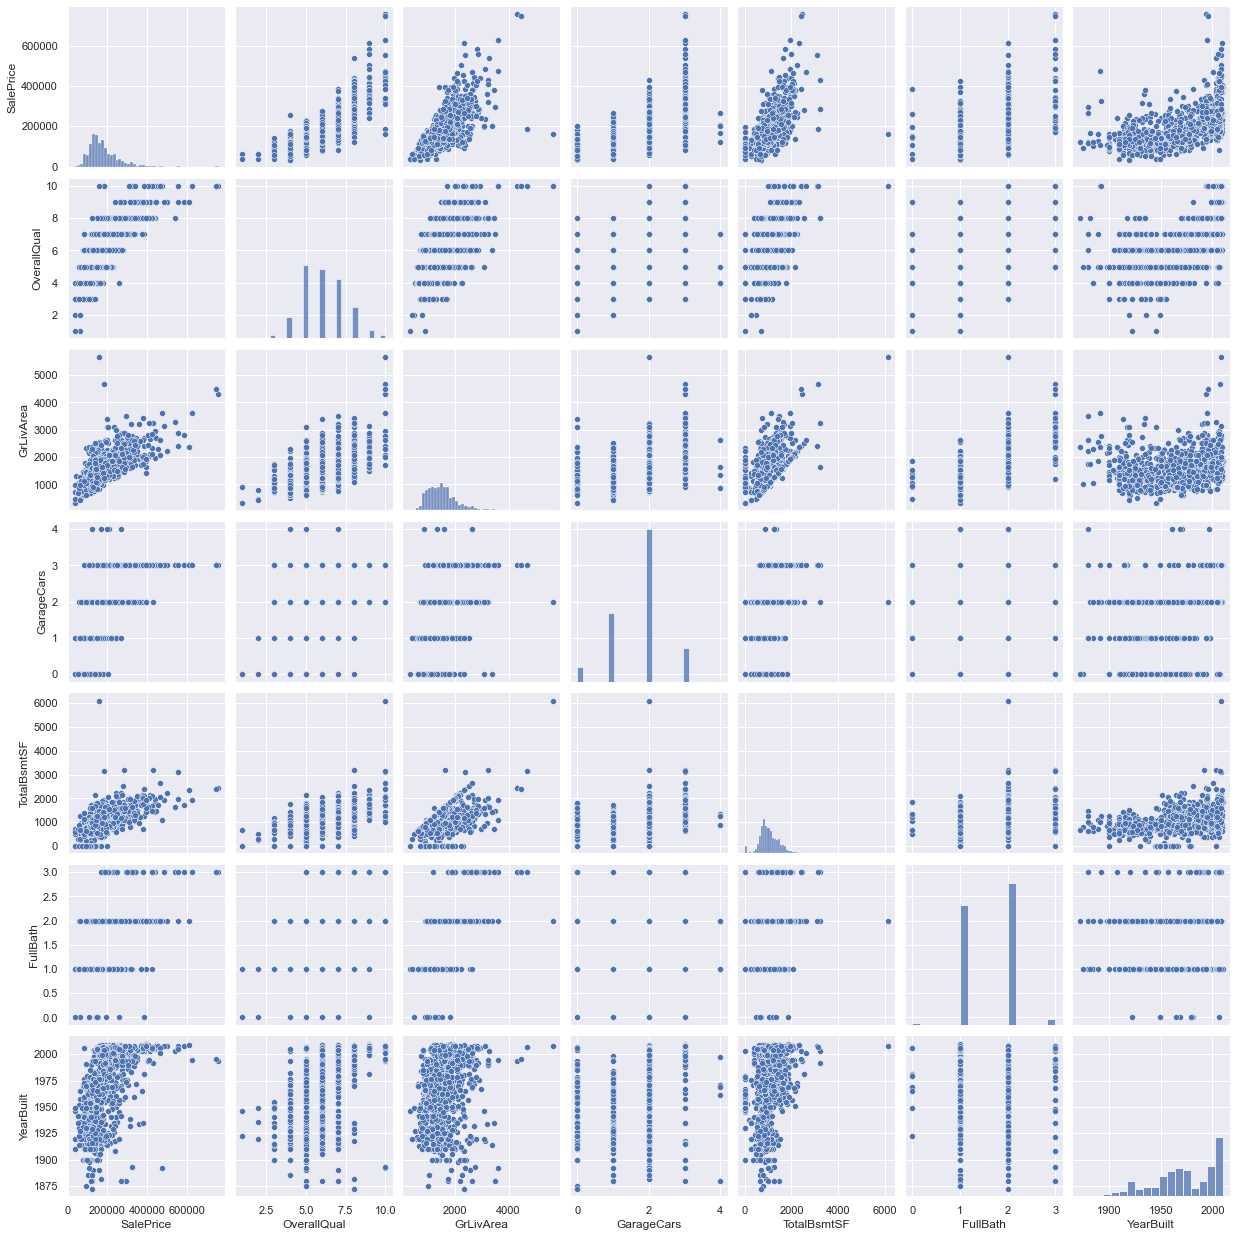

In [15]:
# Scatterplot
sns.set()
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

Embora já conheçamos algumas das figuras principais, este mega gráfico de dispersão nos dá uma ideia razoável sobre as relações das variáveis.

# Missing data (dados faltantes ou ausentes)

Perguntas importantes sobre dados ausentes:

* Qual é a predominância dos dados ausentes?
* Os dados ausentes são aleatórios ou têm um padrão?
A resposta a essas perguntas é importante por razões práticas, porque dados ausentes podem implicar na redução do tamanho da amostra. Isso pode nos impedir de prosseguir com a análise. Além disso, de uma perspectiva substantiva, precisamos garantir que o processo de dados ausentes não seja tendencioso e oculte uma verdade inconveniente. 

In [16]:
# Missing Data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Vamos considerar que sempre que os dados ausentes forem maiores que 15% dos valores em certa variável, iremos deletar tal variável e trabalhar como se ela nunca tivesse existido. Sendo assim, não utilizaremos nenhuma técnica para tratar esses dados faltantes.

In [17]:
# Excluindo os dados ausentes
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

# Outliers (Valores extremos)

“Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto” (Hawkins, 1980), em outras palavras os outliers são dados que se distanciam radicalmente de todos os outros. São pontos fora da curva normal, valores que fogem da normalidade e que podem causar desequilíbrio nos resultados obtidos.

* A principal preocupação aqui é estabelecer um limite que defina uma observação como um outlier. Para isso, padronizaremos os dados. Nesse contexto, a padronização de dados significa converter os valores dos dados em média 0 e desvio padrão 1. 

In [18]:
# Padronizando os dados
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


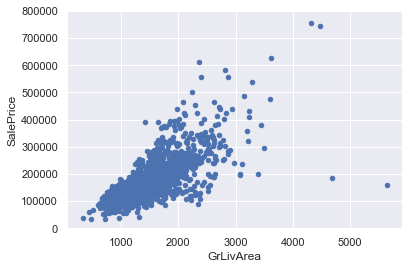

In [19]:
# Análise bivariada entre "SalePrice" e "GrLivArea"
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim = (0,800000))

Fatores a considerar:

* Os dois valores com maior `GrLivArea` estão se comportando de forma estranha, fugindo da normalidade dos outros pontos. Sendo assim, vamos considerá-los como outliers e deletá-los.

* Os dois pontos no topo do gráficos se comportam como casos especiais, contudo, eles parecem estar seguindo o padrão dos outros pontos. Sendo assim, não iremos deletá-los.

In [20]:
# Deletando outliers
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


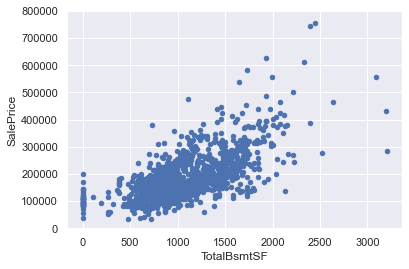

In [21]:
# Análise bivariada entre "SalePrice" e "GrLivArea"
data = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']], axis = 1)
data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim = (0,800000))

# Último mas não menos importante.

In [22]:
# Convertendo variáveis categóricas para o tipo "dummy"
df_train = pd.get_dummies(df_train)

# Conclusão da Análise Exploratória dos Dados
Agora que chegamos ao fim da análise, podemos finalmente seguir para a parte mais curta do projeto, Machine Learning.
Ainda seria possível realizar mais alterações nos dados a fim de deixa-los mais propícios ao modelo de aprendizado de máquina. Contudo, nesse projeto não realizaremos tais modificações.

# Machine Learning

<img src = "machine-learning-1240x620.jpeg"/>

#### Escolha do Modelo
O algoritmo de Machine Learning executado nesse projeto será o de Regressão Linear, visto que, é um dos algoritmos mais simples em regressão.

#### Vantagens - Regressão Linear
* Velocidade

* Não é necessário aprimorar parâmetros

* É um algoritmo de fácil entendimento e altamente interpretável

#### Separando os dados em Treino/Teste
A divisão dos dados em Treino/Teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, treinaremos o modelo com o conjunto de treino e testaremos com o conjunto de teste. Isso fornecerá uma avaliação mais precisa sobre a precisão fora da amostra, porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar os dados. É mais realista para problemas do mundo real.

Vamos dividir os dados em Treino/Teste, sendo 80% dos dados para treino e 20% para teste.

In [23]:
from sklearn.model_selection import train_test_split # Importação da biblioteca necessária
train, test = train_test_split(df_train, test_size = 0.2, random_state = 0) # Dividindo os dados em treino e teste

In [24]:
# Verificando o tamanho dos dados
print(train.shape)
print(test.shape)

(1165, 221)
(292, 221)


In [25]:
train_x = df_train.drop(columns = ['SalePrice'], axis = 1) # Retirando a variável target dos dados de treino
train_y = df_train['SalePrice'] # Separando a variável target

test_x = df_train.drop(columns = ['SalePrice'], axis = 1) # Retirando a variável target dos dados de test
test_y = df_train['SalePrice'] # Separando a variável target

In [26]:
from sklearn.linear_model import LinearRegression # Importanção do modelo
model = LinearRegression() # Instanciando o modelo
model.fit(train_x,train_y) # Treinando o modelo com os dados de treino
predict = model.predict(test_x) # Realizando previsão nos dados de teste

In [30]:
# Verificando o RMSE (root mean squared error)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, predict))
rmse

21340.454473011858

#### Exportando as previsões

In [28]:
predict = pd.DataFrame(columns = ['SalePrice'], data = predict)
predict.index.name = 'Id'
predict.to_csv('Sample_Submission.csv')

# Previsões realizadas pelo modelo

In [29]:
predict_df = pd.read_csv('Sample_Submission.csv')
predict_df.head()

,Id,SalePrice
0,0,212352.648487
1,1,196798.918149
2,2,210843.661163
3,3,168797.855644
4,4,291138.119467


# Conclusão
Finalmente chegamos ao fim do meu primeiro projeto de Data Science. Eu poderia ter realizado diversas outras abordagens na análise exploratória de dados, assim como utilizar diversos outros modelos de machine learning para realizar previsões através dos dados, mas creio que para um primeiro projeto, isso é o suficiente. Continuarei estudando e pretendo me aprofundar cada vez mais nesse universo sensacional que é Data Science.

# Referências
* [Machine Learning with Python: A Practical Introduction](https://courses.edx.org/courses/course-v1:IBM+ML0101EN+3T2020/course/)
* [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)